In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
loan=pd.read_csv("loan.csv")
loan.info()

c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.columns

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       ...
       u'num_tl_90g_dpd_24m', u'num_tl_op_past_12m', u'pct_tl_nvr_dlq',
       u'percent_bc_gt_75', u'pub_rec_bankruptcies', u'tax_liens',
       u'tot_hi_cred_lim', u'total_bal_ex_mort', u'total_bc_limit',
       u'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
#checking missing values in each column
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
# removing the columns having more than 90% missing values
mis_col=loan.columns[100*(loan.isnull().sum()/len(loan.index))>90]
mis_col

Index([u'mths_since_last_record', u'next_pymnt_d',
       u'mths_since_last_major_derog', u'annual_inc_joint', u'dti_joint',
       u'verification_status_joint', u'tot_coll_amt', u'tot_cur_bal',
       u'open_acc_6m', u'open_il_6m', u'open_il_12m', u'open_il_24m',
       u'mths_since_rcnt_il', u'total_bal_il', u'il_util', u'open_rv_12m',
       u'open_rv_24m', u'max_bal_bc', u'all_util', u'total_rev_hi_lim',
       u'inq_fi', u'total_cu_tl', u'inq_last_12m', u'acc_open_past_24mths',
       u'avg_cur_bal', u'bc_open_to_buy', u'bc_util', u'mo_sin_old_il_acct',
       u'mo_sin_old_rev_tl_op', u'mo_sin_rcnt_rev_tl_op', u'mo_sin_rcnt_tl',
       u'mort_acc', u'mths_since_recent_bc', u'mths_since_recent_bc_dlq',
       u'mths_since_recent_inq', u'mths_since_recent_revol_delinq',
       u'num_accts_ever_120_pd', u'num_actv_bc_tl', u'num_actv_rev_tl',
       u'num_bc_sats', u'num_bc_tl', u'num_il_tl', u'num_op_rev_tl',
       u'num_rev_accts', u'num_rev_tl_bal_gt_0', u'num_sats',
       u'num_

In [7]:
loan=loan.drop(mis_col,axis=1)
loan.shape

(39717, 55)

In [8]:
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [9]:
# There are now 2 columns having approx 32 and 64% missing values - 
# description and months since last delinquent
# let's have a look at a few entries in the columns
loan.loc[:,['desc','mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [10]:
# dropping the two columns
loan=loan.drop(['desc','mths_since_last_delinq'],axis=1)

In [11]:
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [12]:
len(loan[loan.isnull().sum(axis=1)>5].index)

0

In [13]:
loan['int_rate']=loan['int_rate'].apply(lambda x:pd.to_numeric(x.split("%")[0]))

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [15]:

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
loan=loan[~loan['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
loan['emp_length']=loan['emp_length'].apply(lambda x: re.findall('\d+',str(x))[0])

# convert to numeric
loan['emp_length']=loan['emp_length'].apply(lambda x:pd.to_numeric(x))

In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [17]:

# customer behaviour variables are not available at the time of loan application, and thus they cannot be used
#as predictors for credit approval
var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [18]:
# let's now remove the behaviour variables from analysis
df=loan.drop(var,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [19]:
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
# thus let get rid of all these variables as well
df=df.drop(['title','url','zip_code','addr_state'],axis=1)

In [20]:
#Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 
#indicating that the person has defaulted and 0 otherwise.
df['loan_status']=df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [21]:
df=df[df['loan_status']!='Current']
df['loan_status']=df['loan_status'].apply(lambda x:0 if x=='Fully Paid' else 1)
df['loan_status']=df['loan_status'].apply(lambda x:pd.to_numeric(x))
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [22]:
# default rate
round(np.mean(df['loan_status']),2)

0.14

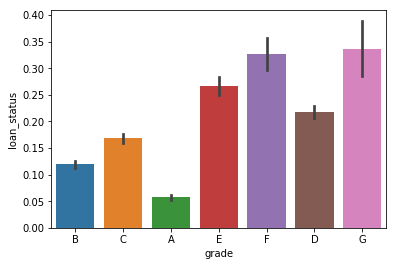

In [23]:
# plotting default rates across grade of the loan
sns.barplot(x='grade',y='loan_status',data=df)

In [24]:
# lets define a function to plot loan_status across categorical variables
def plot(var):
    sns.barplot(x=var,y='loan_status',data=df)

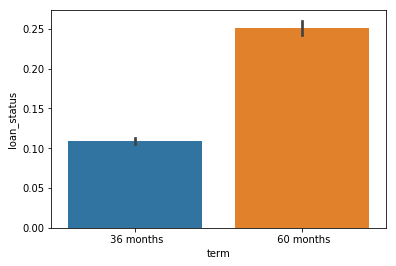

In [25]:
# term: 60 months loans default more than 36 months loans
plot('term')

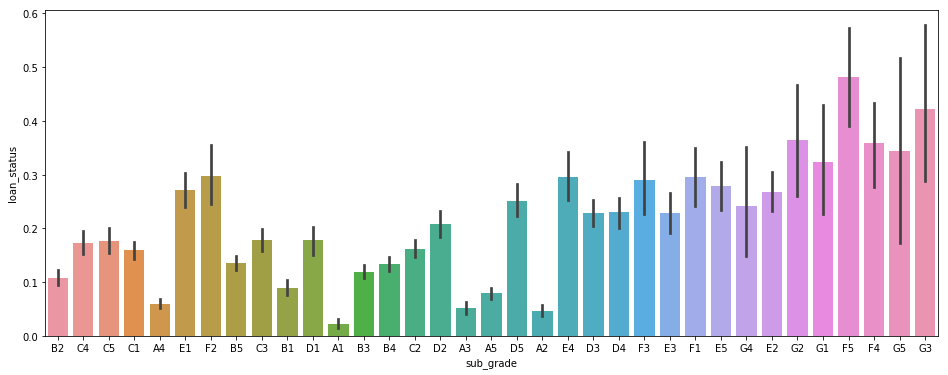

In [26]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on
plt.figure(figsize=(16, 6))
plot('sub_grade')

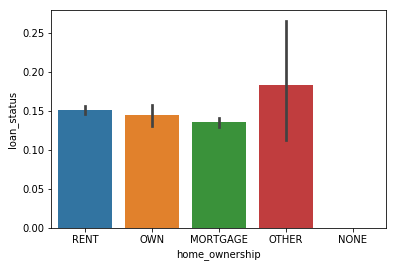

In [27]:
# home ownership: not a great discriminator
plot('home_ownership')

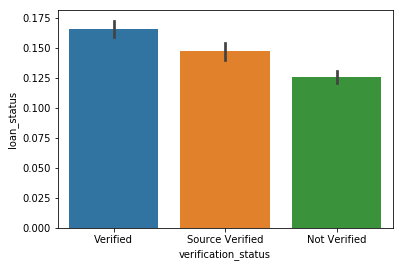

In [28]:
# verification_status: surprisingly, verified loans default more than not verified
plot('verification_status')

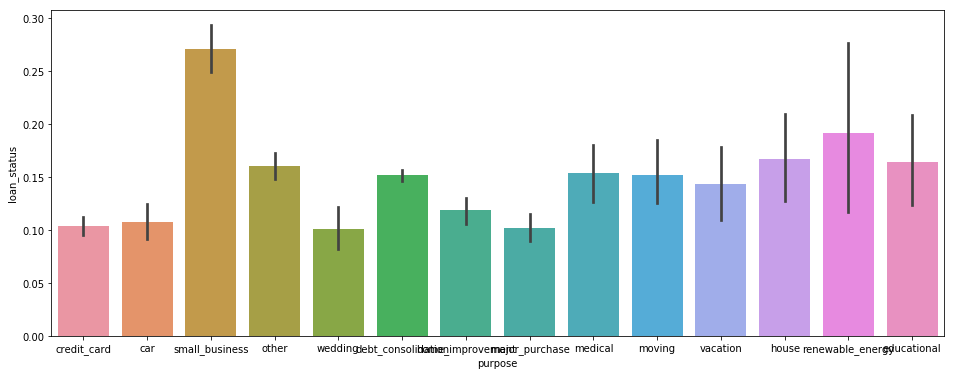

In [29]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
plot('purpose')

In [30]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [32]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [33]:
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [34]:
# let's first observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [35]:
# number of loans across months
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

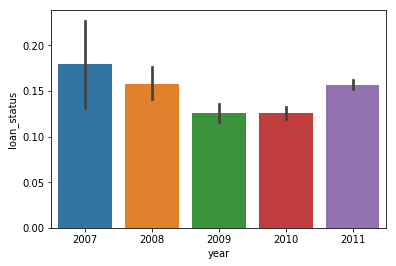

In [36]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plot('year')

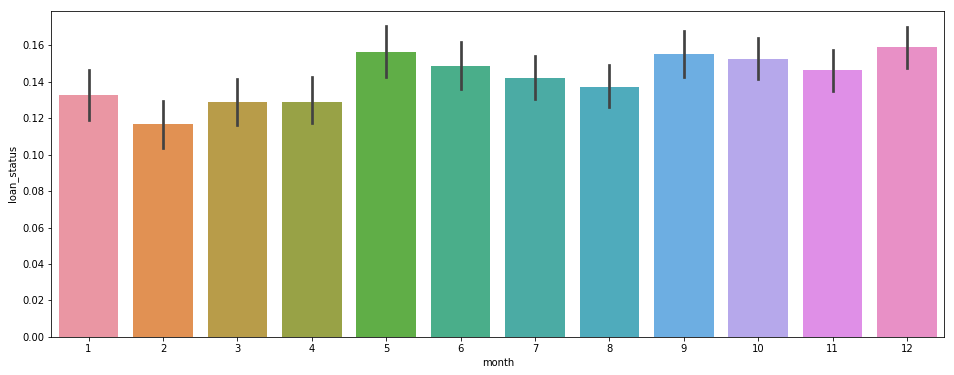

In [37]:
# comparing default rates across months: not much variation across months
plt.figure(figsize=(16, 6))
plot('month')

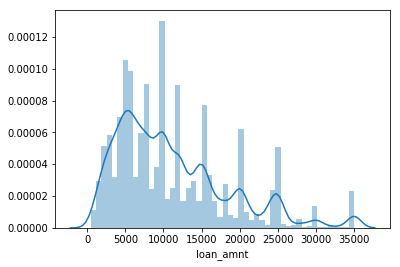

In [38]:
# loan amount: the median loan amount is around 10,000
sns.distplot(df['loan_amnt'])
plt.show()

In [39]:
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))


In [40]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

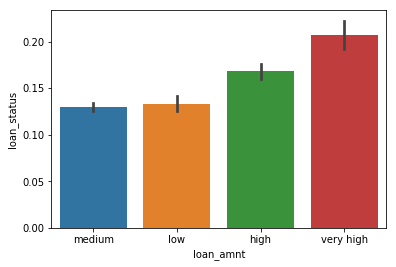

In [41]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
plot('loan_amnt')

In [42]:
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

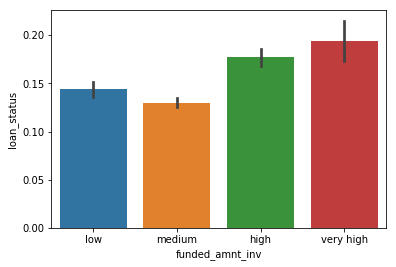

In [43]:
plot('funded_amnt_inv')

In [44]:
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

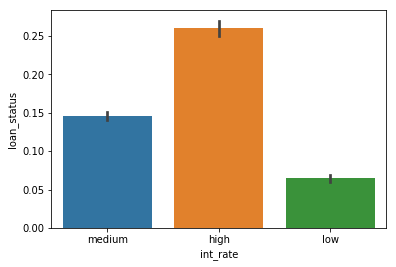

In [45]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
plot('int_rate')

In [46]:
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

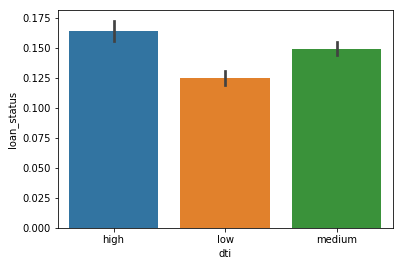

In [47]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot('dti')

In [48]:

def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

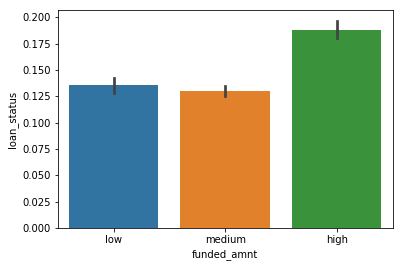

In [49]:
plot('funded_amnt')

In [50]:

def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

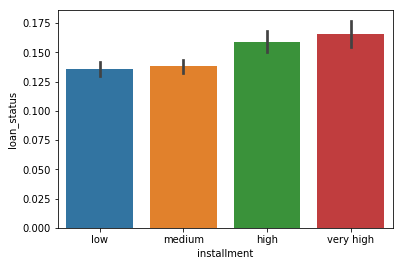

In [51]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot('installment')

In [52]:

def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

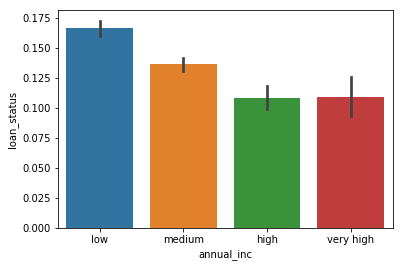

In [53]:
# annual income and default rate
# lower the annual income, higher the default rate
plot('annual_inc')

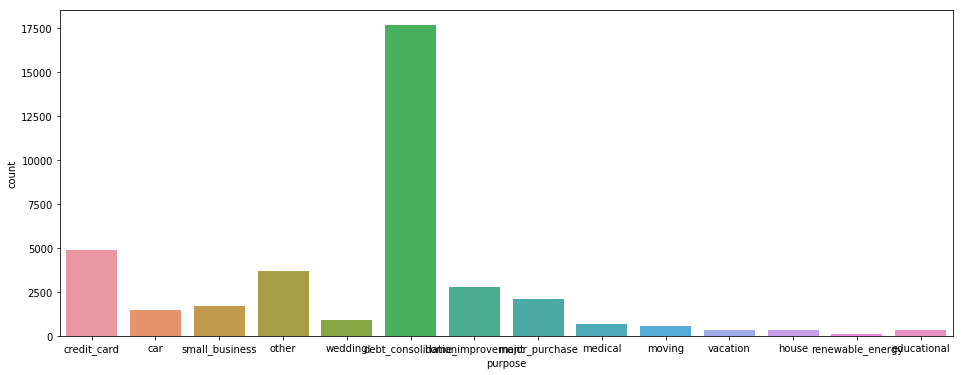

In [54]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=df)
plt.show()

In [55]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

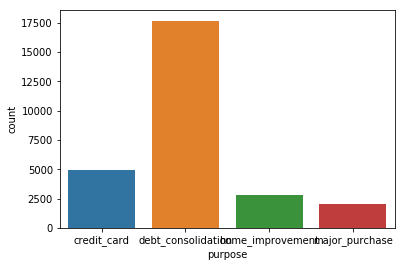

In [56]:
# plotting number of loans by purpose
sns.countplot(x=df['purpose'])
plt.show()

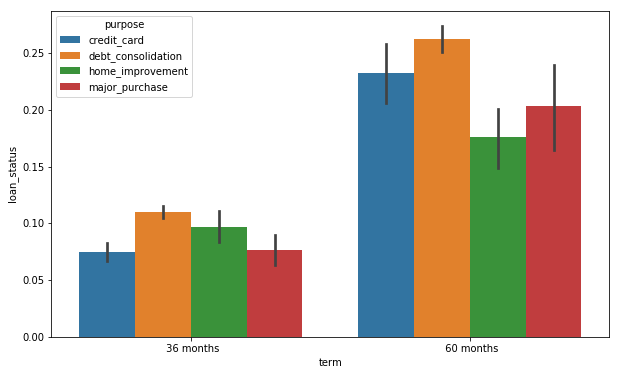

In [57]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

    
plot_segmented('term')

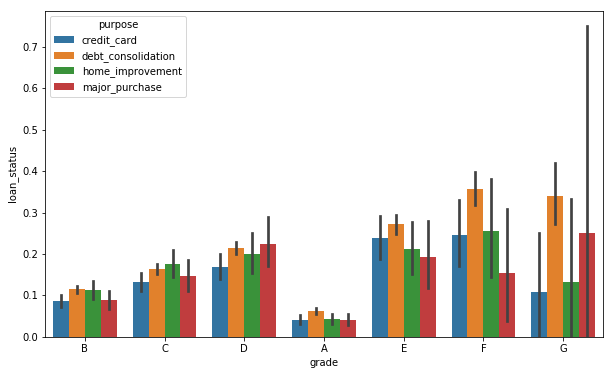

In [58]:
plot_segmented('grade')

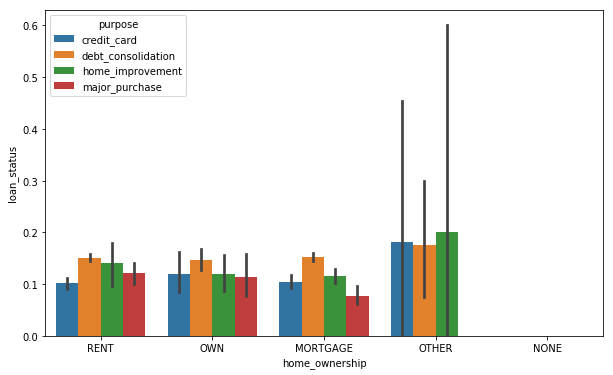

In [59]:
plot_segmented('home_ownership')

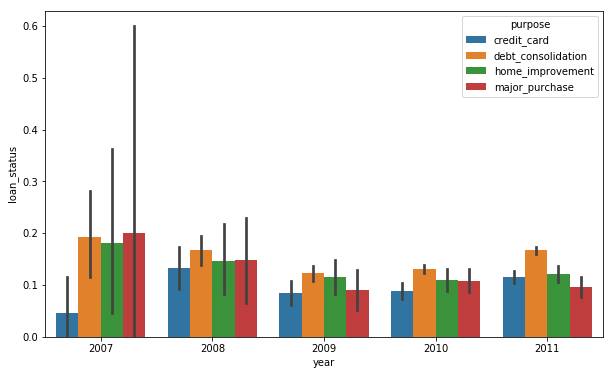

In [60]:
plot_segmented('year')

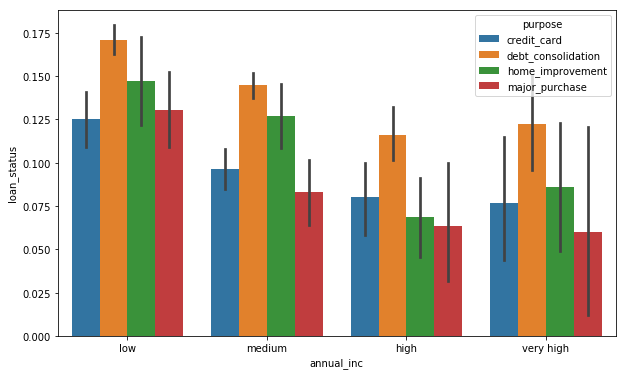

In [61]:
plot_segmented('annual_inc')

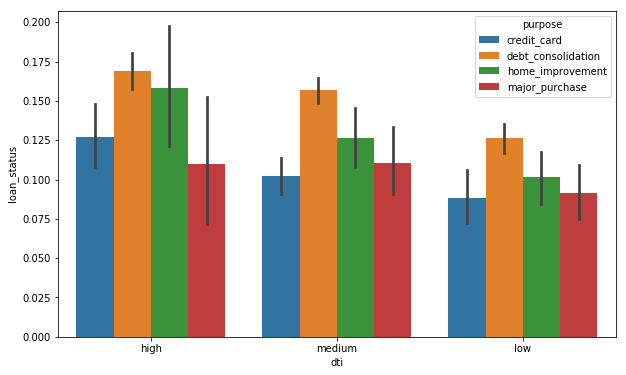

In [62]:
plot_segmented('dti')